In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"D:\SQL\Customer-Churn-Analysis-and-Prediction\datasets\prediction_data.xlsx", sheet_name='vw_ChurnData')

In [3]:

data.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1, inplace=True)

categorical_cols = [
    'gender', 'relationship_status', 'state', 'value_deal', 'data_service', 'dual_connectivity',
    'data_plan', 'cyber_protection', 'data_backup', 'voice_assistance',
    'gadget_protection', 'vip_support', 'video_streaming', 'cinema_streaming',
    'audio_streaming', 'unlimited_data', 'service_commitment', 'digital_invoicing',
    'payment_method'
]

label_encoders = {col: LabelEncoder().fit(data[col]) for col in categorical_cols}
for col, encoder in label_encoders.items():
    data[col] = encoder.transform(data[col])

data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})

In [4]:
X, y = data.drop(columns='customer_status'), data['customer_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[474  24]
 [ 83 137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       498
           1       0.85      0.62      0.72       220

    accuracy                           0.85       718
   macro avg       0.85      0.79      0.81       718
weighted avg       0.85      0.85      0.84       718



C:\Users\prbt3\AppData\Local\Temp\ipykernel_12736\855914323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


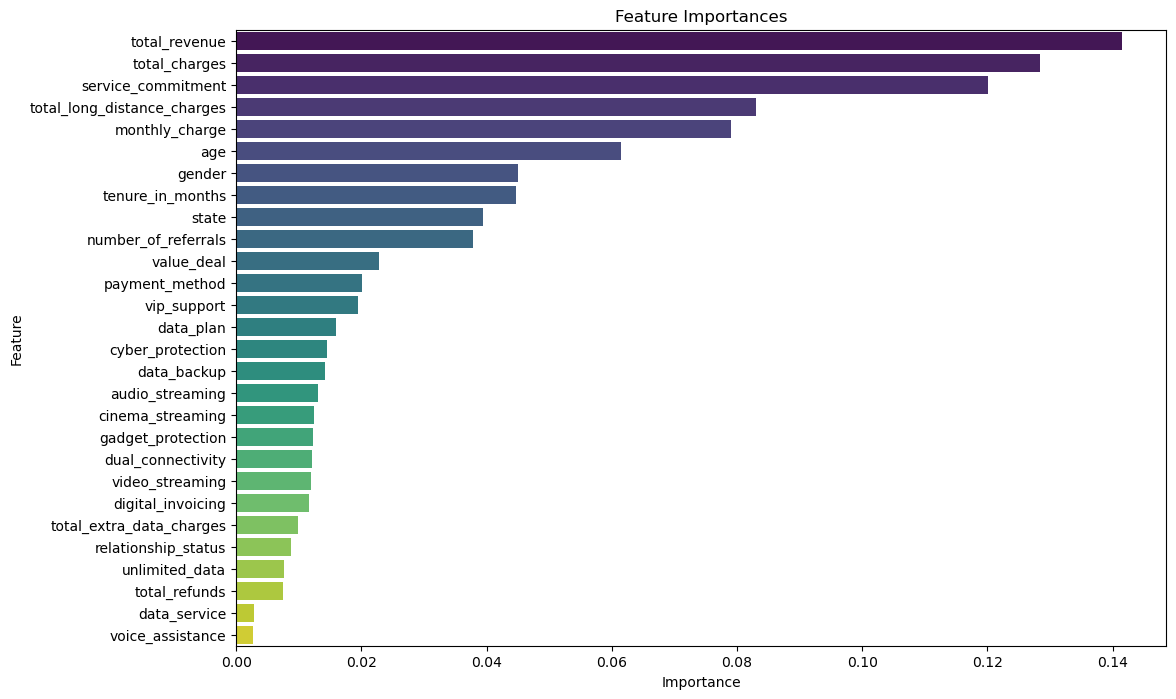

In [7]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [8]:
new_data = pd.read_excel(r"D:\SQL\Customer-Churn-Analysis-and-Prediction\datasets\prediction_data.xlsx", sheet_name='vw_JoinData')
new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1, inplace=True)

In [9]:
for col in new_data.select_dtypes(include='object').columns:
    new_data[col] = label_encoders[col].transform(new_data[col])

In [10]:
new_data['Predicted_Status'] = model.predict(new_data)
predicted_churn = new_data[new_data['Predicted_Status'] == 1]

In [ ]:
predicted_churn.to_csv(r"D:\SQL\Customer-Churn-Analysis-and-Prediction\datasets\predicted_data.csv", index=False)